In [1]:
from fish_helpers import *
base = '/hybedata/Images/Maeve/BMDM_FISH/3T3_TNFa_probe_check_of_BMDM_probeset_2020Feb21/'
spotcalls_prepurge = pickle.load(open(os.path.join(base,'codestacks','spotcalls_prepurge.pkl'),'rb'))
spotcalls = pickle.load(open(os.path.join(base,'codestacks','spotcalls.pkl'),'rb'))


In [6]:
Counter(spotcalls[spotcalls.npixels>1].gene)

Counter({'Mycl': 185211,
         'Mxd1': 105865,
         'Tlr8': 46357,
         'Ampd3': 7055,
         'Rel': 857,
         'Ptgs2': 120,
         'Akt1': 136,
         'Six1': 930,
         'Gem': 175,
         'Tnfrsf11a': 283,
         'Tnfsf4': 12216,
         'Rela': 107,
         'blank5': 532,
         'blank9': 32589,
         'blank11': 114,
         'Trim13': 100,
         'blank12': 60,
         'Zc3h12c': 351,
         'Myd88': 7582,
         'Pou3f1': 43,
         'Tnfrsf21': 433,
         'Nfkbia': 644,
         'Vcan': 62,
         'Tnfsf14': 484,
         'Armcx6': 186,
         'Fscn1': 395,
         'Sell': 519,
         'Itgb8': 52,
         'Fgl2': 249,
         'Tnfrsf13b': 1147,
         'Oasl1': 1590,
         'Sod2': 197,
         'Tnf': 377,
         'Hcar2': 682,
         'Misp': 446,
         'Ikbkg': 28,
         'I830077J02Rik': 91,
         'Pdgfb': 61,
         'Rab11fip1': 509,
         'Il1a': 480,
         'Birc3': 55,
         'Batf2': 286,
      

Gdap10  no gid found
Pla2g16  no gid found
Akap2  no gid found


/home/zach/PythonRepos/PySpots/fish_helpers.py:84: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(fpkms),np.log10(counts),c=color,alpha=alpha,label=label)


SpearmanrResult(correlation=-0.06975633691652275, pvalue=0.3718332125574103)
Akap2  no gid found
Pla2g16  no gid found
Gdap10  no gid found
SpearmanrResult(correlation=-0.029478774943198904, pvalue=0.706159149152499)
Pla2g16  no gid found
Gdap10  no gid found
Akap2  no gid found
SpearmanrResult(correlation=0.0006114626952836204, pvalue=0.9937617103229568)


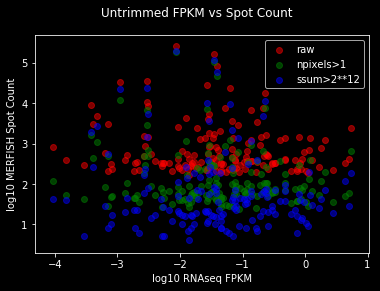

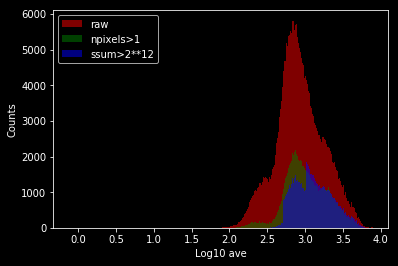

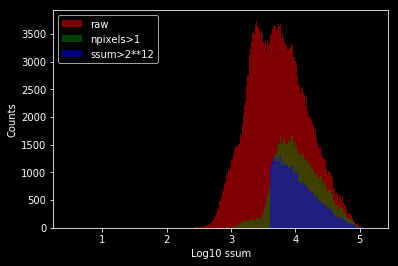

In [2]:
plt.style.use(['dark_background'])
spotcalls_qc(spotcalls,system='3t3')

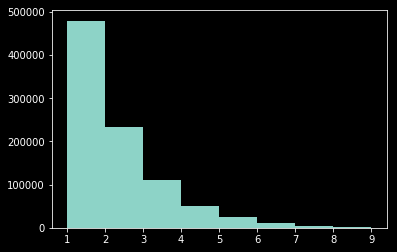

In [11]:
plt.hist(spotcalls.npixels,bins=np.array(range(1,10)))
plt.show()

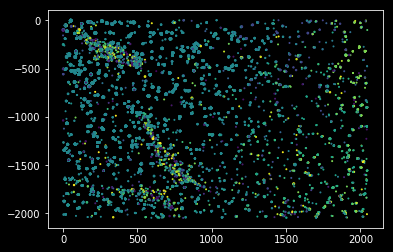

In [28]:
pos_spotcalls = spotcalls[(spotcalls.posname=='Pos43')]
xy = np.stack(pos_spotcalls.centroid)
plt.scatter(xy[:,1],-xy[:,0],s=pos_spotcalls.npixels,c=pos_spotcalls.cword_idx)
plt.show()

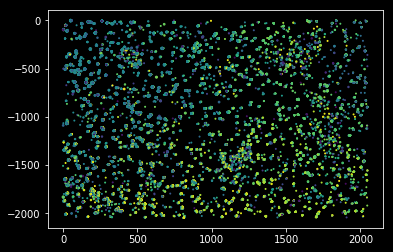

In [29]:
pos_spotcalls = spotcalls[(spotcalls.posname=='Pos1')]
xy = np.stack(pos_spotcalls.centroid)
plt.scatter(xy[:,1],-xy[:,0],s=pos_spotcalls.npixels,c=pos_spotcalls.cword_idx)
plt.show()

In [12]:
spotcalls.head()

,gene,ssum,centroid,ave,npixels,cword_idx,z,posname
0,Tlr8,9271.0,"(1.0, 57.0)",2317.750,1,136,1,Pos15
1,Mycl,47324.0,"(3.8, 51.4)",2366.200,5,87,1,Pos15
2,Mxd1,18765.0,"(3.5, 53.0)",2345.625,2,86,1,Pos15
3,Rel,4486.0,"(6.0, 1832.0)",1121.500,1,107,1,Pos15
4,Tlr8,7642.0,"(7.0, 1642.0)",1910.500,1,136,1,Pos15


In [ ]:
def knn_impute_dendrogram_position(reference,measurement,node_df,k=1):
    ref_cells = np.array(reference.index)
    reference = np.array(reference)
    cells = np.array(measurement.index)
    ncells = len(cells)
    k = 1
    dist = euclidean_distances(reference, np.array(measurement))
    print('Distances Calculated')
    rank = dist.argpartition(k+1,axis=0)[:k+1,:]
    print('Distances Ranked')
    imputed_node_df = pd.DataFrame(index=cells,columns=node_df.columns)
    nn_cells = ref_cells[rank[1,:]]
    print('NN Found')
    temp = node_df.loc[nn_cells]
    temp.index = cells
    imputed_node_df.loc[cells] = temp
    return imputed_node_df

In [ ]:
def calculate_accuracy_dendrogram(truth,imputed):
    accuracy_matrix = np.zeros(len(imputed.columns))
    false_positive_rate_matrix = np.zeros(len(imputed.columns))
    false_negative_rate_matrix = np.zeros(len(imputed.columns))
    for i,node in tqdm.tqdm(enumerate(imputed.columns),total=len(imputed.columns)):
        imputed_cells = list(imputed[imputed[node]==1].index)
        truth_cells = list(truth[truth[node]==1].index)
        true = len(set(imputed_cells).intersection(truth_cells))
        fp = len(imputed_cells)-true
        fn = len(truth_cells)-true
        ltruth = len(truth_cells)
        if ltruth>0:
            accuracy_matrix[i] = true/ltruth
            false_positive_rate_matrix[i] = fp/ltruth
            false_negative_rate_matrix[i] = fn/ltruth
        else:
            accuracy_matrix[i] = 0
            false_positive_rate_matrix[i] = 0
            false_negative_rate_matrix[i] = 0
    return accuracy_matrix,false_positive_rate_matrix,false_negative_rate_matrix

In [ ]:
import tqdm
node_matrix = np.zeros((len(cells),len(binary_node_df.index)))
for cell_type in tqdm.tqdm(good_types):
    cell_type_cells = list(metadata[metadata['cell_type_alias_label']==cell_type].index)
    cell_type_cells = list(set(cell_type_cells).intersection(cells))
    cell_type_node = np.array(binary_node_df[cell_type])
    node_matrix[np.where(np.isin(cells,cell_type_cells)),:] = cell_type_node
node_df = pd.DataFrame(node_matrix,index=cells,columns=binary_node_df.index)
simulated_compressed = 
measurement = simulated_compressed.loc[random.sample(list(simulated_compressed.index),int(len(simulated_compressed)*0.5))]
imputed_node_df = knn_impute_dendrogram_position(simulated_compressed,measurement,node_df,k=1)
truth_node_df = node_df.loc[measurement.index]
accuracy_matrix,false_positive_rate_matrix,false_negative_rate_matrix = calculate_accuracy_dendrogram(truth_node_df,imputed_node_df)
accuracy_matrix_df = pd.DataFrame(accuracy_matrix,index=imputed.columns)